In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
warnings.filterwarnings("ignore")

**(a)**


In [17]:

dataset = np.loadtxt("data_banknote_authentication.txt",delimiter=",")

data = dataset[:,:4]
labels = dataset[:,4]
#data
np.shape(data)
# col = np.where(labels==0,'k',np.where(labels==1,'b','r'))


(1372, 4)

In [18]:
#label
np.shape(labels)

(1372,)

In [19]:
testset = []
trainingset = []
targetset= []
zerocounter, onecounter = 0,0
for i in range(np.shape(dataset)[0]):
    if dataset[i][4] == 0:
        zerocounter += 1
        if zerocounter <= 312:
            testset.append(dataset[i])
        else:
            trainingset.append(dataset[i])
            targetset.append(dataset[i][4])
    elif dataset[i][4] == 1:
        onecounter += 1
        if onecounter <= 160:
            testset.append(dataset[i])
        else:
            trainingset.append(dataset[i])
            targetset.append(dataset[i][4])

test = np.array(testset)
train = np.array(trainingset)
target = np.array(targetset)

print ("Test data shape      : ",test.shape)
print ("Training data shape  : ",train.shape)
print ("Target data shape  : ",target.shape)


Test data shape      :  (472, 5)
Training data shape  :  (900, 5)
Target data shape  :  (900,)


(b)i)

In [4]:
cols=['variance','skewness','curtosis','entropy']
cols2=['variance','skewness','curtosis','entropy','class']

X_train=pd.DataFrame(train[:,:4],columns=cols)
#print(X_train)
X_test=pd.DataFrame(test[:,:4],columns=cols)

y_train=pd.DataFrame(train[:,4],columns=['class'])
y_test=pd.DataFrame(test[:,4],columns=['class'])
#print(y_test)
train_df_master=pd.DataFrame(train,columns=cols2)
test_df_master=pd.DataFrame(test,columns=cols2)

In [22]:


kf=KFold(n_splits=10)
svc=LinearSVC(penalty='l1',dual=False)

#parameters={'C':np.linspace(0.01,5,50)}
parameters={'C':[1,10]}
gsc=GridSearchCV(svc,parameters,cv=kf)

passiveErrors = np.zeros(90)
errors=[]

for n in range(0,50):
    temp_DF=pd.DataFrame()
    errors=[]
    train_df_parent=train_df_master
    test_df_parent=test_df_master
    x_axis=[]
    
    for i in range(0,90):

        #print(i)
        tempArray_0=train_df_parent.loc[train_df_parent['class'] == 0].sample(n=5)
        tempArray_1=train_df_parent.loc[train_df_parent['class'] == 1].sample(n=5)
        x=[temp_DF,tempArray_0,tempArray_1]
        temp_DF=pd.concat(x)

        #print(temp_DF.shape)
        train_df_parent=train_df_parent[~train_df_parent.index.isin(temp_DF.index)]
        #print(train_df_parent.shape)

        gsc.fit(temp_DF.loc[:,:'entropy'],temp_DF['class'])
        accuracy_score=gsc.score(test_df_parent.loc[:,:'entropy'],test_df_parent['class'])
        err=1-accuracy_score
        errors.append(err)
        passiveErrors[i]+=err
        x_axis.append(i)
#print(errors)
        

In [23]:
zero_data = np.zeros(shape=(90,2)
df_svm_passive = pd.DataFrame(zero_data, columns=['SVM','Errors'])
for i in range(90):
    df_svm_passive[i]['SVM'] = i+1
    df_svm_passive[i]['Errors'] = errors[i]
    

SyntaxError: invalid syntax (<ipython-input-23-43a0a36be7ba>, line 2)

In [ ]:
print("\n")

plt.title('Test-errors for 90 SVMs- Passive Learning at 50th step')
plt.xlabel('Number of SVMs')
plt.ylabel('Test Error')
plt.plot(x_axis,errors)
plt.show()
#print(errors)

In [ ]:
print(np.array(passiveErrors).shape)

<h2>ii.) Active Learning</h2>

In [8]:


kf=KFold(n_splits=10)
svc=LinearSVC(penalty='l1',dual=False)

#parameters={'C':np.linspace(0.01,5,50)}
parameters={'C':[1,10]}
gsc=GridSearchCV(svc,parameters,cv=kf)

activeErrors = np.zeros(90)
errors=[]

for n in range(0,50):
    temp_DF=pd.DataFrame()
    errors=[]
    train_df_parent=train_df_master
    test_df_parent=test_df_master
    x_axis=[]
    
    tempArray_0=train_df_parent.loc[train_df_parent['class'] == 0].sample(n=5)
    tempArray_1=train_df_parent.loc[train_df_parent['class'] == 1].sample(n=5)
        
    
    for i in range(0,90):

        #print(i)
        x=[temp_DF,tempArray_0,tempArray_1]
        temp_DF=pd.concat(x)

        #print(temp_DF.shape)
        train_df_parent=train_df_parent[~train_df_parent.index.isin(temp_DF.index)]
        #print(train_df_parent.shape)
        
        gsc.fit(temp_DF.loc[:,:'entropy'],temp_DF['class'])
        accuracy_score=gsc.score(test_df_parent.loc[:,:'entropy'],test_df_parent['class'])
        err=1-accuracy_score
        errors.append(err)
        activeErrors[i]+=err
        x_axis.append(i)
        
        if i==89:
            continue
        y=gsc.decision_function(train_df_parent.loc[:,:'entropy'])
        y=abs(y)
        x_loc=y.argsort()[:10]
       
        tempArray_0=train_df_parent.iloc[x_loc,:]
        tempArray_1=pd.DataFrame()
        
        
#print(errors)
#x_axis.append(89)    

In [ ]:
zero_data = np.zeros(shape=(90,2)
df_svm_active = pd.DataFrame(zero_data, columns=['SVM','Errors'])
for i in range(90):
    df_svm_active[i]['SVM'] = i+1
    df_svm_active[i]['Errors'] = errors[i]
    

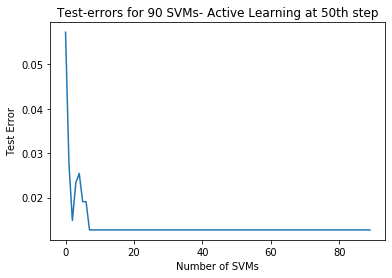

In [9]:
print("\n")

plt.title('Test-errors for 90 SVMs- Active Learning at 50th step')
plt.xlabel('Number of SVMs')
plt.ylabel('Test Error')
plt.plot(x_axis,errors)
plt.show()
#print(errors)

In [10]:
print(np.array(activeErrors).shape)

(90,)


<h2>(c). Monte Carlo simulation </h2>

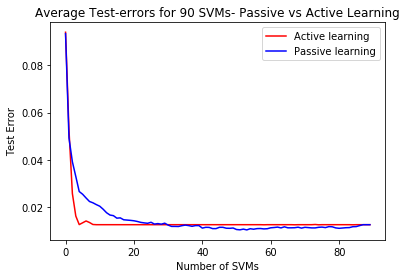

In [11]:
pl = [p/50 for p in passiveErrors]
al = [a/50 for a in activeErrors]

plt.title('Average Test-errors for 90 SVMs- Passive vs Active Learning')
plt.xlabel('Number of SVMs')
plt.ylabel('Test Error')
plt.plot(x_axis, al,'r',label="Active learning")
plt.plot(x_axis, pl,'b',label="Passive learning")
plt.legend()
plt.show()



<pre>
The error rate decreases rapidly for both, while adding more data points.  Active learning performs better at earlier stages itself.  The smoothness in the curve without much kinks denotes a more stable model, even when the n_samples are less.
</pre>